In [1]:
### Identifying B cell clonal relationships ###
# wt or control

# Load packages required for this example
library(scoper)
library(dplyr)
library(ggplot2)
library(alakazam)
library(shazam)

# loading my tsv as a df
require(data.table)
db <- as.data.frame(fread("../../changeo_10x/filtered_contig_db-pass.tsv"))

# Clonal assignment using identical nucleotide sequences
results <- identicalClones(db, method="nt")

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘alakazam’


The following object is masked from ‘package:scoper’:

    ExampleDb


As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A des

In [2]:
read.table("../../changeo_10x/filtered_contig_db-pass.tsv", sep = '\t', header = TRUE)

sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,⋯,cdr3,cell_id,c_call,consensus_count,umi_count,v_call_10x,d_call_10x,j_call_10x,junction_10x,junction_10x_aa
<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCTGAGACAAAGG-1_contig_1,GGGAAGTGTGCAGCCATGGGCAGGCTTACTTCTTCATTCCTGTTACTGATTGTCCCTGCATATGTCCTGTCCCAGGTTACTCTGAAAGAGTCTGGCCCTGGGATATTGCAGCCCTCCCAGACCCTCAGTCTGACTTGTTCTTTCTCTGGGTTTTCACTGAGCACTTTTGGTATGGGTGTAGGCTGGATTCGTCAGCCTTCAGGGAAGGGTCTGGAGTGGCTGGCACACATTTGGTGGGATGATGATAAGTACTATAACCCAGCCCTGAAGAGTCGGCTCACAATCTCCAAGGATACCTCCAAAAACCAGGTATTCCTCAAGATCGCCAATGTGGACACTGCAGATACTGCCACATACTACTGTGCTCGAATAGGGGGGCTACAGTACTACTTTGACTACTGGGGCCAAGGCACCACTCTCACAGTCTCCTCAGGTAATGAAAAGGGACCTGACATGTTCCTCCTCTCAGAGTGCAAAGCCCCAGAGGAAAATGAAAAGATAAACCTGGGCTGTTTAGTAATTGGAAGTCAGCCACTGAAAATCAGCTGGGAGCCAAAGAAGTCAAGTATAGTTGAACATGTCTTCCCCTCTGAAATGAGAAATGGCAATTATACAATGGTCCTCCAGGTCACTGTGCTGGCCTC,FALSE,TRUE,IGHV8-8*01,"IGHD3-1*01,IGHD3-2*01",IGHJ2*01,CAGGTTACTCTGAAAGAGTCTGGCCCT...GGGATATTGCAGCCCTCCCAGACCCTCAGTCTGACTTGTTCTTTCTCTGGGTTTTCACTGAGC......ACTTTTGGTATGGGTGTAGGCTGGATTCGTCAGCCTTCAGGGAAGGGTCTGGAGTGGCTGGCACACATTTGGTGGGAT.........GATGATAAGTACTATAACCCAGCCCTGAAG...AGTCGGCTCACAATCTCCAAGGATACCTCCAAAAACCAGGTATTCCTCAAGATCGCCAATGTGGACACTGCAGATACTGCCACATACTACTGTGCTCGAATAGGGGGGCTACAGTACTACTTTGACTACTGGGGCCAAGGCACCACTCTCACAGTCTCCTCAG,CAGGTTACTCTGAAAGAGTCTGGCCCT...GGGATATTGCAGCCCTCCCAGACCCTCAGTCTGACTTGTTCTTTCTCTGGGTTTTCACTGAGC......ACTTTTGGTATGGGTGTAGGCTGGATTCGTCAGCCTTCAGGGAAGGGTCTGGAGTGGCTGGCACACATTTGGTGGGAT.........GATGATAAGTACTATAACCCAGCCCTGAAG...AGTCGGCTCACAATCTCCAAGGATACCTCCAAAAACCAGGTATTCCTCAAGATCGCCAATGTGGACACTGCAGATACTGCCACATACTACTGTGCTCGAATAGNNGGGCTACNNNACTACTTTGACTACTGGGGCCAAGGCACCACTCTCACAGTCTCCTCAG,TGTGCTCGAATAGGGGGGCTACAGTACTACTTTGACTACTGG,⋯,GCTCGAATAGGGGGGCTACAGTACTACTTTGACTAC,AAACCTGAGACAAAGG-1,IGHD,640,4,IGHV8-8,,IGHJ2,TGTGCTCGAATAGGGGGGCTACAGTACTACTTTGACTACTGG,CARIGGLQYYFDYW
AAACCTGAGACAAAGG-1_contig_2,GGGAATCAGAACTCTTCACACCAAGTTCTCAGAATGAGGTGCTCTCTTCAGTTCCTGGGGGTGCTTATGTTCTGGATCTCTGGAGTCAGTGGGGATATTGTGATAACCCAGGATGAACTCTCCAATCCTGTCACTTCTGGAGAATCAGTTTCCATCTCCTGCAGGTCTAGTAAGAGTCTCCTATATAAGGATGGGAAGACATACTTGAATTGGTTTCTGCAGAGACCAGGACAATCTCCTCAGCTCCTGATCTATTTGATGTCCACCCGTGCATCAGGAGTCTCAGACCGGTTTAGTGGCAGTGGGTCAGGAACAGATTTCACCCTGGAAATCAGTAGAGTGAAGGCTGAGGATGTGGGTGTGTATTACTGTCAACAACTTGTAGAGTATCCGTACACGTTCGGAGGGGGGACCAAGCTGGAAATAAAACGGGCTGATGCTGCACCAACTGTATCCATCTTCCCACCATCCAGTGAGCAGTTAACATCTGGAGGTGCCTCAGTCGTGTGCTTC,FALSE,TRUE,IGKV2-112*01,,IGKJ2*01,GATATTGTGATAACCCAGGATGAACTCTCCAATCCTGTCACTTCTGGAGAATCAGTTTCCATCTCCTGCAGGTCTAGTAAGAGTCTCCTATATAAG...GATGGGAAGACATACTTGAATTGGTTTCTGCAGAGACCAGGACAATCTCCTCAGCTCCTGATCTATTTGATG.....................TCCACCCGTGCATCAGGAGTCTCA...GACCGGTTTAGTGGCAGTGGG......TCAGGAACAGATTTCACCCTGGAAATCAGTAGAGTGAAGGCTGAGGATGTGGGTGTGTATTACTGTCAACAACTTGTAGAGTATCCGTACACGTTCGGAGGGGGGACCAAGCTGGAAATAAAAC,GATATTGTGATAACCCAGGATGAACTCTCCAATCCTGTCACTTCTGGAGAATCAGTTTCCATCTCCTGCAGGTCTAGTAAGAGTCTCCTATATAAG...GATGGGAAGACATACTTGAATTGGTTTCTGCAGAGACCAGGACAATCTCCTCAGCTCCTGATCTATTTGATG.....................TCCACCCGTGCATCAGGAGTCTCA...GACCGGTTTAGTGGCAGTGGG......TCAGGAACAGATTTCACCCTGGAAATCAGTAGAGTGAAGGCTGAGGATGTGGGTGTGTATTACTGTCAACAACTTGTAGAGTATCCGTACACGTTCGGAGGGGGGACCAAGCTGGAAATAAAAC,TGTCAACAACTTGTAGAGTATCCGTACACGTTC,⋯,CAACAACTTGTAGAGTATCCGTACACG,AAACCTGAGACAAAGG-1,IGKC,2504,11,IGKV2-112,,IGKJ2,TGTCAACAACTTGTAGAGTATCCGTACACGTTC,CQQLVEYPYTF
AAACCTGAGACTGGGT-1_contig_1,TGGGGAAATACATCAGATCAGCATGGGCATCAAGATGGAGTCACAGACTCAGGTCTTTGTATACATGTTGCTGTGGTTGTCTGGTGTTGATGGAGACATTGTGATGACCCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACCGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCGTGGACGTTCGGTGGAGGCACCAAGCTGGAAATCAAACGGGCTGATGCTGCACCAACTGTATCCATCTTCCCACCATCCAGTGAGCAGTTAACATCT

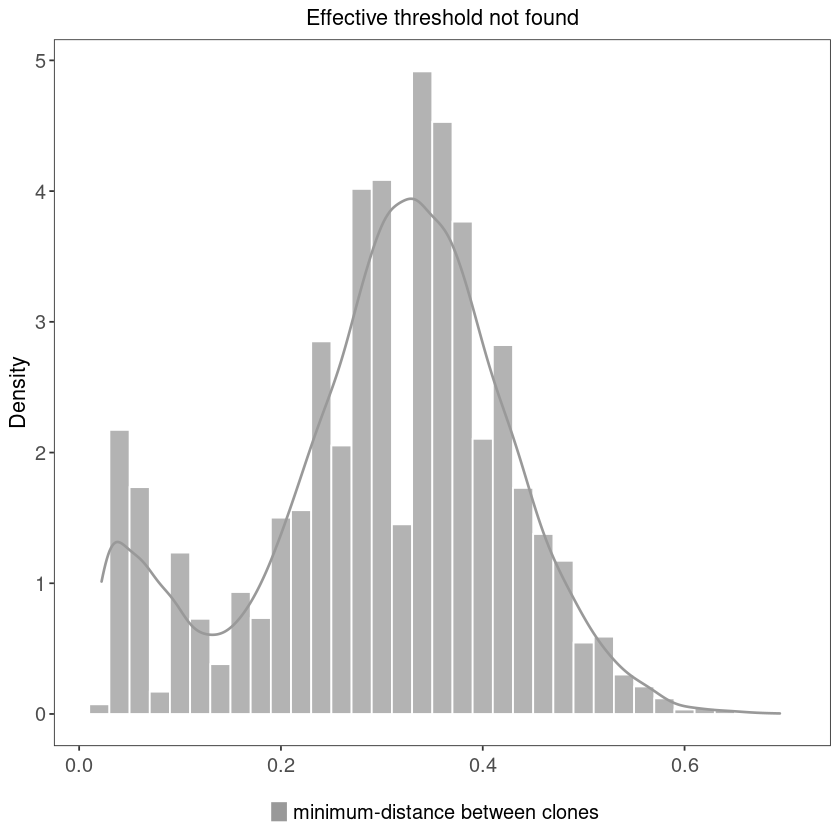

In [3]:
# Plot a histogram of inter clonal distances
plot(results, binwidth=0.02)

In [4]:
# Get summary data.frame
glimpse(summary(results))

Rows: 2,473
Columns: 7
$ vjl_group       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ sequence_count  <int> 1, 1, 1, 1, 1, 2, 4, 4, 4, 3, 1, 2, 5, 7, 3, 2, 1, 1,…
$ v_call          <chr> "IGHV1-11*01", "IGHV1-15*01", "IGHV1-15*01", "IGHV1-1…
$ j_call          <chr> "IGHJ1*03", "IGHJ3*01", "IGHJ3*01", "IGHJ3*01", "IGHJ…
$ junction_length <int> 42, 21, 27, 30, 33, 36, 39, 42, 45, 48, 33, 36, 39, 4…
$ clone_count     <int> 1, 1, 1, 1, 1, 2, 4, 4, 4, 3, 1, 2, 5, 7, 3, 2, 1, 1,…
$ clone_id        <chr> "1", "2718", "4043", "4258", "4599", "4857,4858", "51…


In [5]:
# Clonal assignment using hierarchical clustering
results <- hierarchicalClones(db, threshold=0.15)

Running defineClonesScoper in bulk mode



In [6]:
# Get results data.frame
results_db <- as.data.frame(results)
glimpse(results_db)

Rows: 10,824
Columns: 58
$ sequence_id        <chr> "AGATTGCAGCGTTTAC-1_contig_1", "CGCGTTTGTTCCACAA-1…
$ sequence           <chr> "AGAGCAACATATGACCCCTGTCTTCTCTACAGTCACTGAGTATACAGAA…
$ rev_comp           <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", …
$ productive         <chr> "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", …
$ v_call             <chr> "IGHV1-11*01", "IGHV1-15*01", "IGHV1-15*01", "IGHV…
$ d_call             <chr> "IGHD1-1*01", "IGHD3-2*02", "IGHD2-4*01,IGHD2-9*02…
$ j_call             <chr> "IGHJ1*03", "IGHJ3*01", "IGHJ3*01", "IGHJ3*01", "I…
$ sequence_alignment <chr> "CAGATCCAGCTGCAACAGTCAGGAGCT...GAGCTGGCGAGTCCTGGGG…
$ germline_alignment <chr> "CAGATCCAGCTGCAACAGTCAGGAGCT...GAGCTGGCGAGTCCTGGGG…
$ junction           <chr> "TGTGTCCTTACTACGGTAGTAGGGGGGTACTTCGATGTCTGG", "TGT…
$ junction_aa        <chr> "CVLTTVVGGYFDVW", "CTRCGTAQAMAWFAYW", "CTSWAYDYDGA…
$ v_cigar            <chr> "113S289=", "87S294=", "81S293=", "102S293=", "100…
$ d_cigar            <chr> 

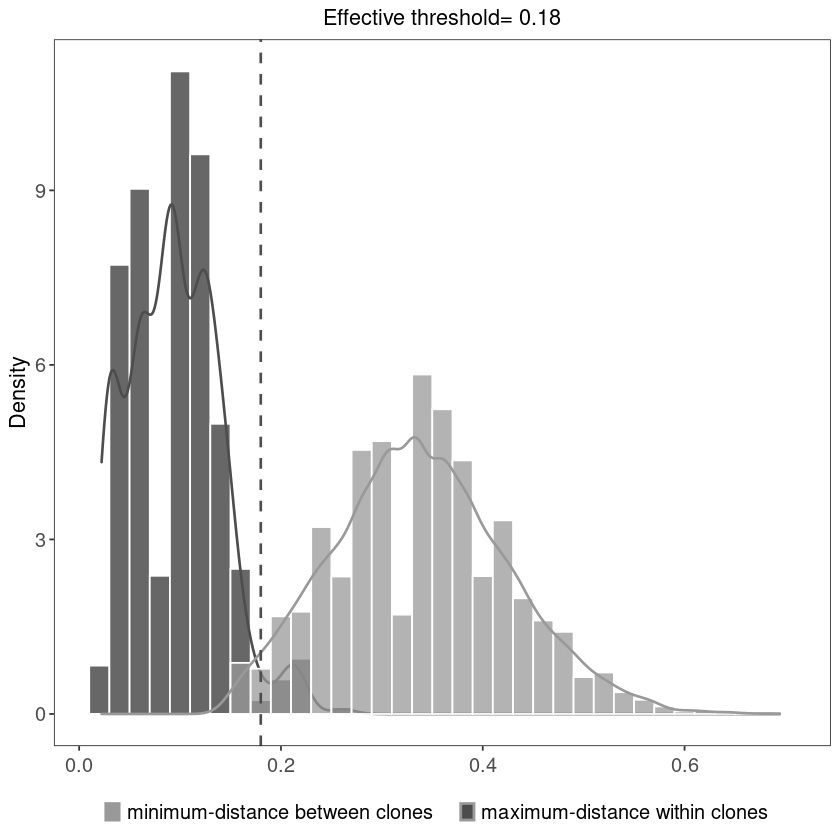

In [7]:
# Plot a histogram of inter and intra clonal distances
plot(results, binwidth=0.02)

Running defineClonesScoper in bulk mode



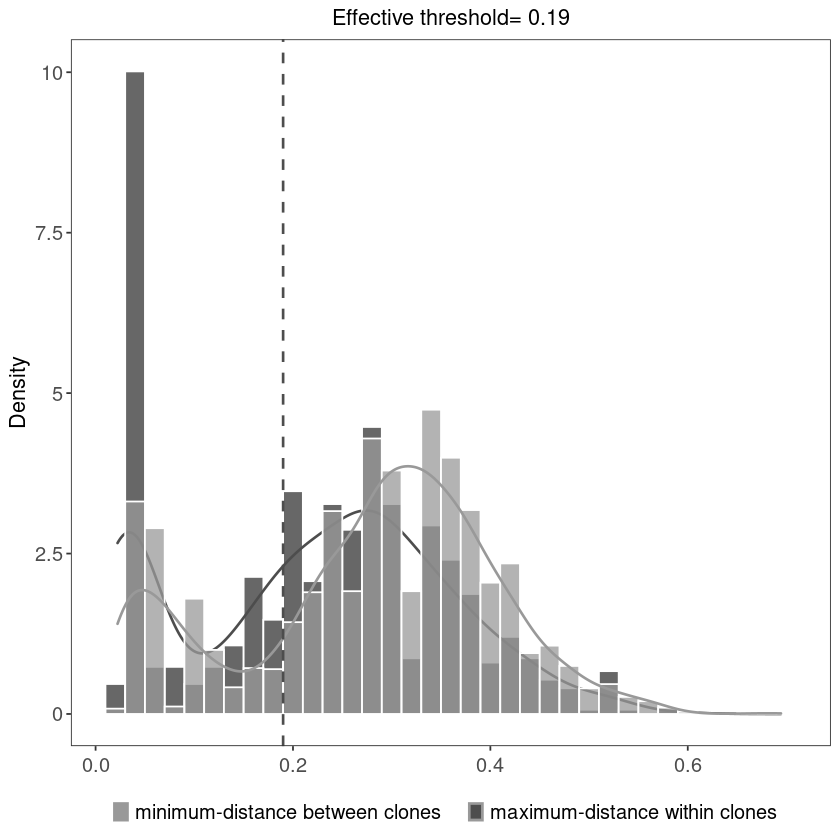

In [8]:
# 3. Clonal assignment using the spectral clustering (unsupervised) method novj
# This function concludes the clonal relationships using an adaptive unsupervised threshold
# to indicate the similarity levels within junction sequences in a local neighbor.
results <- spectralClones(db, method="novj")
# Plot a histogram of inter and intra clonal distances
plot(results, binwidth=0.02)

Running defineClonesScoper in bulk mode



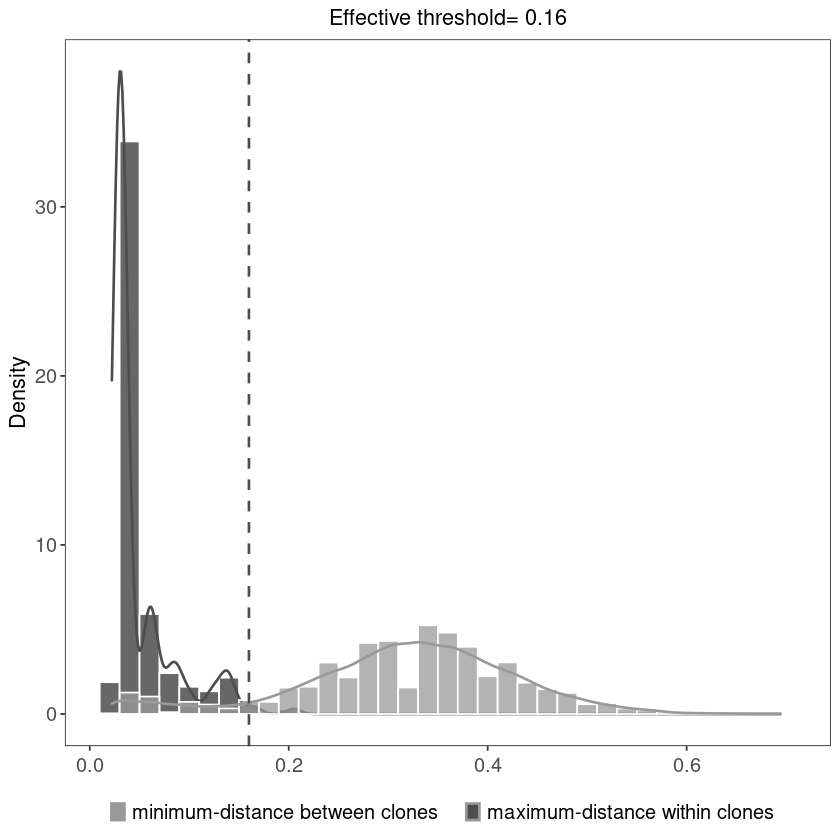

In [9]:
# Clonal assignment using the spectral clustering method novj with threshold
results <- spectralClones(db, method="novj",
                          threshold=0.15)
# Plot a histogram of inter and intra clonal distances
plot(results, binwidth=0.02)

Warning message:
“Removed 70 rows containing non-finite values (stat_count).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”


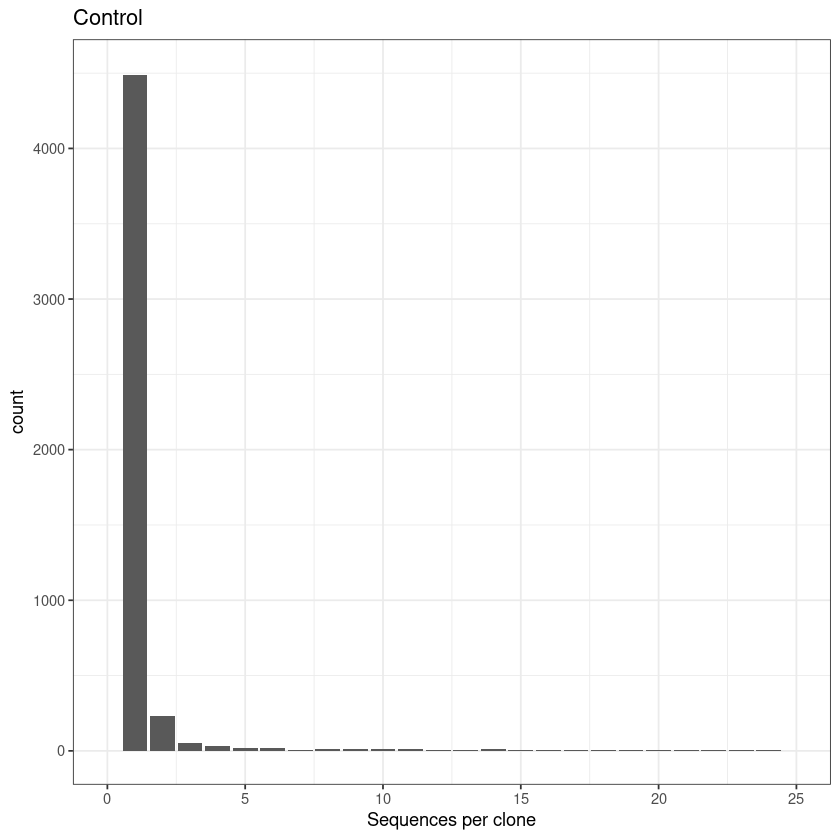

In [10]:
clone_sizes <- countClones(results_db)

# Plot cells per clone
ggplot(clone_sizes, aes(x=seq_count)) + geom_bar() + theme_bw() + xlab("Sequences per clone") + xlim(0, 25) + ylim(0, 4500)  + ggtitle("Control")